In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
import healpy as hp
from ccgpack import sky2patch,patch2sky

cmap = plt.cm.jet
cmap.set_under('w')
cmap.set_bad('gray',1.)

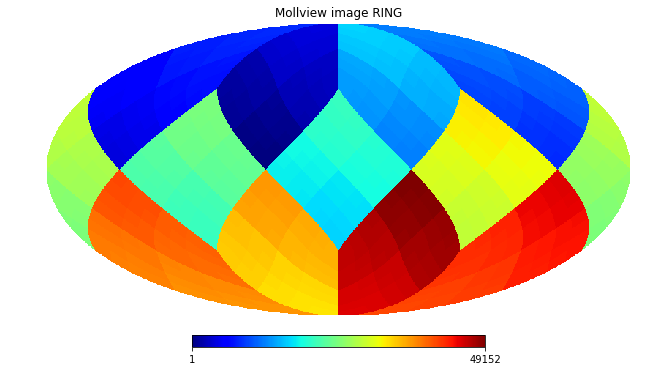

In [2]:
NSIDE = 64
m = np.arange(hp.nside2npix(NSIDE))+1

hp.mollview(m,nest=True, title="Mollview image RING",cmap=cmap,min=m.min(),max=m.max())

In [3]:
patches = sky2patch(m,2)
patches.max()==m.max()

True

In [4]:
patches.shape

(48, 32, 32)

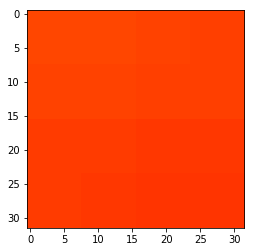

In [5]:
plt.imshow(patches[40],cmap=cmap,vmin=m.min(),vmax=m.max())

In [6]:
mp = patch2sky(patches)
print ('Difference:',(m-mp).sum())

Difference: 0.0


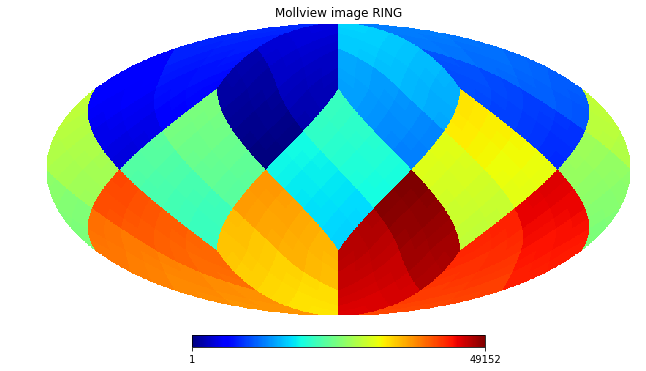

In [7]:
hp.mollview(mp,nest=True, title="Mollview image RING",cmap=cmap,min=m.min(),max=m.max())

# Some fun

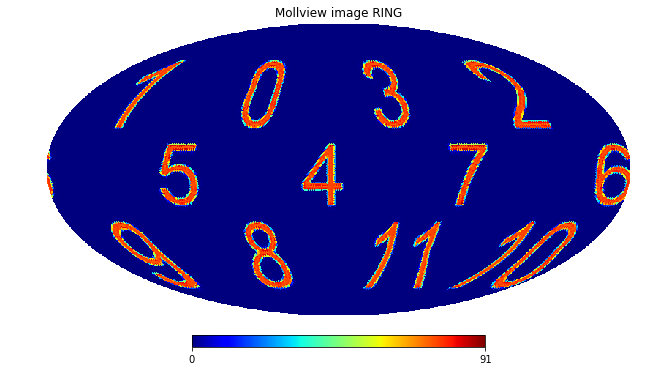

In [8]:
import os
from PIL import Image, ImageDraw, ImageFont
from scipy.ndimage.interpolation import rotate

fontsize = 50
font = ImageFont.truetype("arial.ttf", fontsize)
W, H = (64,64)

patches = []
for i in range(12):
    msg = str(i)
    im = Image.new("RGBA",(W,H), color = (0, 0, 0))
    draw = ImageDraw.Draw(im)
    w, h = draw.textsize(msg)
    draw.text(((W-w)/6,(H-h)/7), msg, fill="red", font=font)
    im.save('temp.png')
    img = Image.open('temp.png').convert("L")
    arr = np.array(img)
    arr = np.fliplr(rotate(arr, 180-45, axes=(1, 0), reshape=0))
    patches.append(arr)
os.remove('temp.png')
patches = np.array(patches)
mp = patch2sky(patches)
hp.mollview(mp,nest=True, title="Mollview image RING",cmap=cmap)